Noah Anderson  
Module 4  
6/28/2024  

# Question 1

## a. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in players hall of fame data
players = pd.read_csv("hall_of_fame.csv")

pd.set_option('display.max_columns', None)
players.head()

,first,last,seasons,games,AB,runs,hits,doubles,triples,HR,RBI,BB,SO,BA,OBP,SP,AP,BR,ABRuns,Runs.Created,SB,CS,Stolen.Base.Runs,Fielding.Average,Fielding.Runs,Primary.Position.Played,Total.Player.Rating,Hall.Fame.Membership
0,HANK,AARON,23,3298,12364,2174,3771,624,98,755,2297,1402,95.0,0.305,0.377,0.555,156,878,902,2550,143.0,114.0,50.0,0.980,54,O,84.6,Select by writers
1,JERRY,ADAIR,13,1165,4019,378,1022,163,19,57,366,208,451.0,0.254,0.294,0.347,80,-117,-113,376,178.0,64.0,30.0,0.985,-30,2,-6.6,not a member
2,SPARKY,ADAMS,13,1424,5557,844,1588,249,48,9,394,453,202.0,0.286,0.343,0.353,82,-121,-133,679,59.0,89.0,NaN,0.974,-37,2,-10.1,not a member
3,BOBBY,ADAMS,14,1281,4019,591,1082,188,49,37,303,414,408.0,0.269,0.340,0.368,90,-54,-54,523,304.0,66.0,NaN,0.955,10,3,-4.3,not a member
4,JOE,ADCOCK,17,1959,6606,823,1832,295,35,336,1122,594,27.0,0.277,0.339,0.485,125,158,198,1033,108.0,60.0,NaN,0.994,-28,1,6.3,not a member


## b

Text(0.5, 1.0, 'Batting Average Histogram')

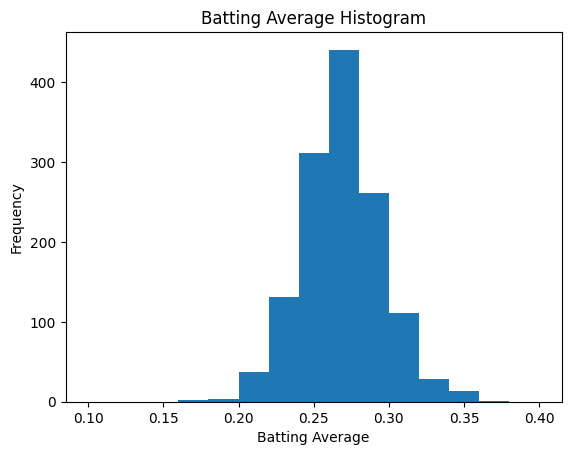

In [2]:
# Create custom bin range from .1 to .4 by .02
plot_bins = np.arange(.1, .4, .02)

# Create Batting Average Histogram
plt.hist(players['BA'], bins = plot_bins)
plt.xlabel("Batting Average")
plt.ylabel("Frequency")
plt.title("Batting Average Histogram")

## c. 

In [3]:
# Create Hall of Fame column for players
players['HF'] = np.where(players["Hall.Fame.Membership"] == "not a member", 
                         False, True)

## d. 

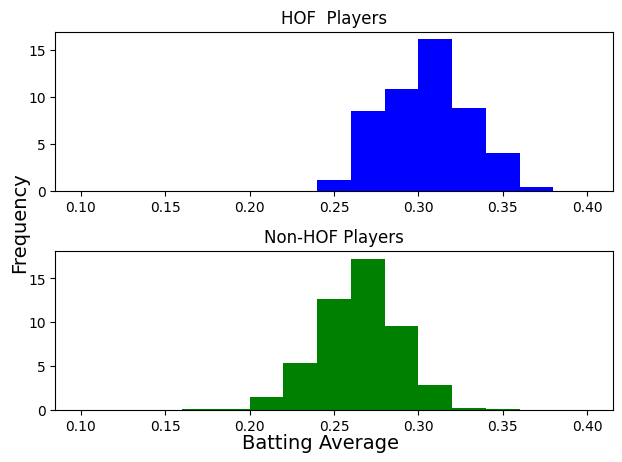

In [4]:
fig = plt.figure()

# Create HOF histogram
ax1 = fig.add_subplot(211)
hof_BA = players[players['HF']]['BA']
ax1.hist(x = hof_BA, bins = plot_bins, color = 'b', density = True)
ax1.set_title("HOF  Players")

# Create non-HOF histogram
non_hof_BA =  players[~players['HF']]['BA']
ax2 = fig.add_subplot(212)
ax2.hist(x = non_hof_BA, bins = plot_bins, color = 'g', density = True)
ax2.set_title("Non-HOF Players")


# Adding joint x and y labels
fig.text(0.5, 0.04, 'Batting Average', ha='center', va='center',
          fontsize = 14)
fig.text(0.03, 0.5, 'Frequency', ha='center', va='center',
          rotation='vertical', fontsize = 14)

# Increases padding around subplots to prevent text overlap
plt.tight_layout(pad = 2.0, h_pad = 1)



## e. 

Text(0.5, 1.0, 'Primary Position')

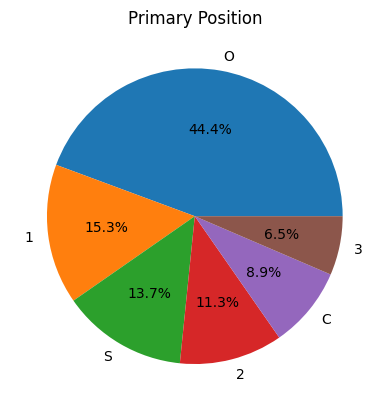

In [5]:
# Create counts of HOF players by position
hof_position_frequencies = (players[players['HF']]['Primary.Position.Played']
                           .value_counts())

# Create pie chart of HOF players by position
plt.pie(hof_position_frequencies.values, 
        labels = hof_position_frequencies.index, autopct='%1.1f%%')
plt.title('Primary Position')

Text(0, 0.5, 'Frequency')

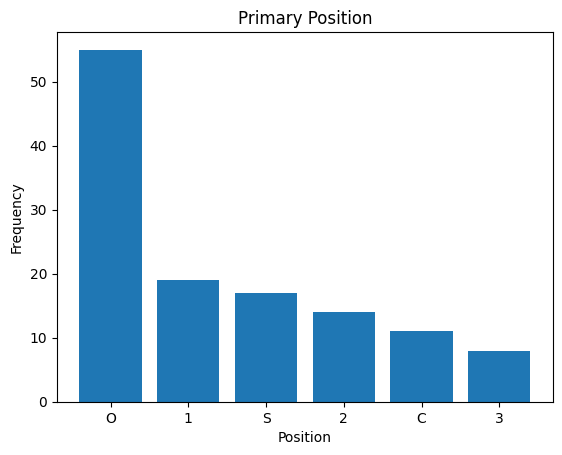

In [6]:
# Create HOF bart chart by position
plt.bar(hof_position_frequencies.index, 
        hof_position_frequencies.values)
plt.title('Primary Position')
plt.xlabel('Position')
plt.ylabel('Frequency')

## f. 

Text(0, 0.5, 'Batting Average')

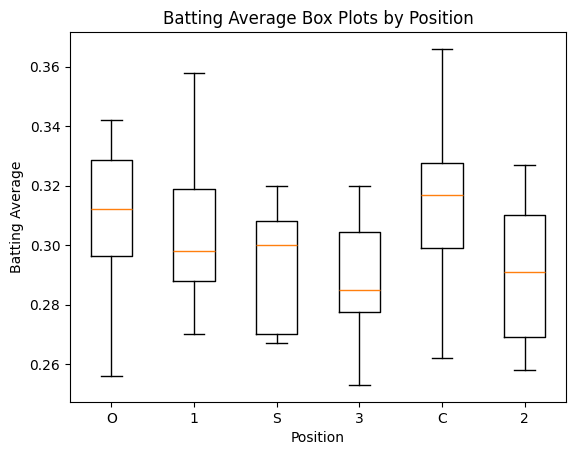

In [7]:
# Filter data frame for HOF players
hfPlayers = players[players.HF == True]

# Create a list of primary position played for HOF players
pos_list = hfPlayers['Primary.Position.Played'].unique()

# Create a list of Batting averages grouped by primary position played
data_list = (hfPlayers.
             groupby('Primary.Position.Played')['BA']
             .apply(list))

# Create box plot of batting average by position
plt.boxplot(data_list, labels = pos_list)
plt.title("Batting Average Box Plots by Position")
plt.xlabel("Position")
plt.ylabel("Batting Average")

## g. 

Text(0, 0.5, 'Player Rating')

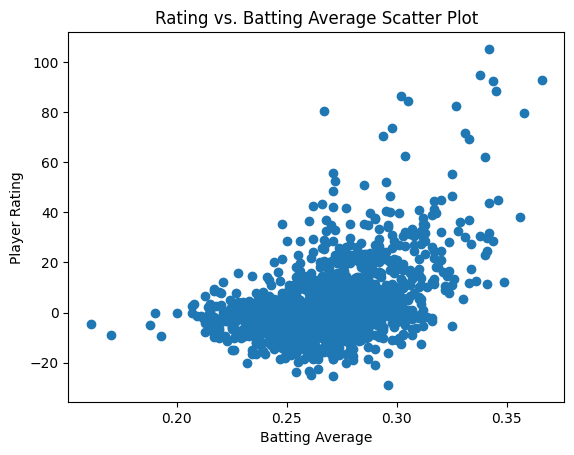

In [8]:
# Create scatterplot of player rating by batting average
plt.scatter(players['BA'], players['Total.Player.Rating'])
plt.title("Rating vs. Batting Average Scatter Plot")
plt.xlabel("Batting Average")
plt.ylabel("Player Rating")

## h.
Q: Describe the shape of the distribution of batting averages, and describe how the batting averages of Hall of Fame inductees differ from those who were not inducted into the Hall of Fame.  

A: The distribution of batting averages follow a fairly normal bell curve. The HOF vs. non-HOF distributions also follow a normal curve but with HOF players having a larger median by around .05 batting average. 


Q: What factor likely explains the prevalence of outfielders in the Hall of Fame inductees?  

A: The primary factor behind the prevelance of outfielders in the Hall of Fame inductees is that the outfield actually represents 3 positions. If you for instance counted baseman as one category instead of 3, then they would represent 33.1% of the HOF inductees, only 11.3 percent less than the outfielders. This is further demonstrated by showing a pie graph of HOF and non-HOF by position shown side-by-side. Here we see that a dispropriante number of non-HOF players are also outfielders.

Given this though, HOF players representing 44.4% of HOF players, while not as impressive if it were truly one position, it still represents more than its player share on the field which is 33.3%. This overrepresentation could be explained by the box plots of batting average by position in which outfielders had the highest averages along with catchers. 

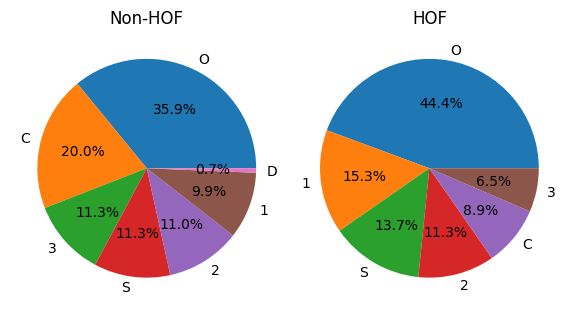

In [9]:
fig = plt.figure(figsize = (12, 8))

# Create pie chart of HOF players
ax1 = fig.add_subplot(211)
ax1.pie(hof_position_frequencies.values, 
        labels = hof_position_frequencies.index, autopct = '%1.1f%%')
ax1.set_title("HOF")

# Create pie chart of non-HOF players
ax2 = fig.add_subplot(221)
non_hof_position_frequencies = (players[~players['HF']]
                                ['Primary.Position.Played']
                                .value_counts())
ax2.pie(non_hof_position_frequencies.values, 
        labels = non_hof_position_frequencies.index, autopct='%1.1f%%')
ax2.set_title("Non-HOF")

# Increases padding around subplots
plt.tight_layout(pad = 5.0)  




Q: What position is conspicuously absent from the categories in your graph? It’s always good to think about how a data set was put together. Why do you think that the creator of this data set might have left that position out?   

A: Pitchers are absent from this dataset. I would assume it is because pitchers have such different metrics since they do not hit often and are not expected to be good hiters. So their low batting averages would skew modeling since good pitchers would still have low averages while still being in the HOF. 

Q: Is there any other position that appears to be underrepresented in the data set?  

A: Designated hitter appears to only represent .7% of non-HOF players and pinch hitters are absent all together. 


Q: Batting average is often seen as a measure of player ability, especially by those who haven’t gotten deeply into baseball statistics. How well correlated is batting average with “Total Player Rating”?   

A: Shown below is the correlation coefficient for batting average and player rating. At .47 this correlation is fairly low. When examing the scatter plot from part g, we see a somewhat postive correlation, but with a large variance. You will see many players with negative ratings with the same general batting average as players in the 80s. This could be explained by the fact that batting is just one part of baseball. What you do on defense can make a significant impact on you rating as well as batting. 

In [10]:
# Calculate correlation coefficient for BA and rating
np.corrcoef(players['BA'], players['Total.Player.Rating'])[0, 1]

0.46965523377585233

# Question 2

In [11]:
import seaborn as sns

Text(0, 0.5, 'Batting Average')

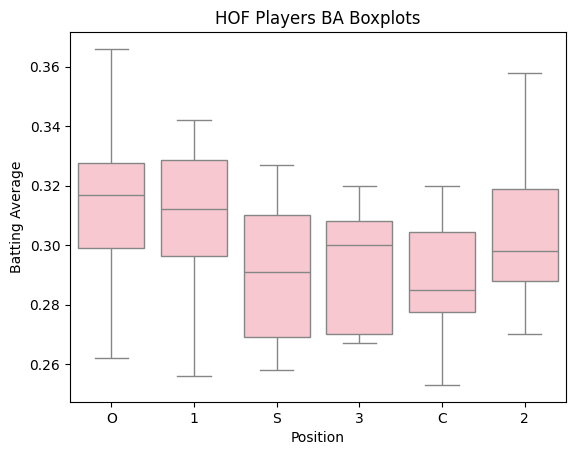

In [12]:
# Create box plots using seaborn
sns.boxplot(data = hfPlayers, x = 'Primary.Position.Played', 
            y = 'BA', color = 'pink')
plt.title("HOF Players BA Boxplots")
plt.xlabel("Position")
plt.ylabel("Batting Average")

# Question 3

In [13]:
from matplotlib.ticker import MaxNLocator


gas = (pd.read_csv("gas_prices.csv")
  .filter(['Year', 'USA', 'Canada', 'South Korea', 'Australia'])
  .melt(id_vars='Year', var_name='Country', value_name='Gas_Price')
  )



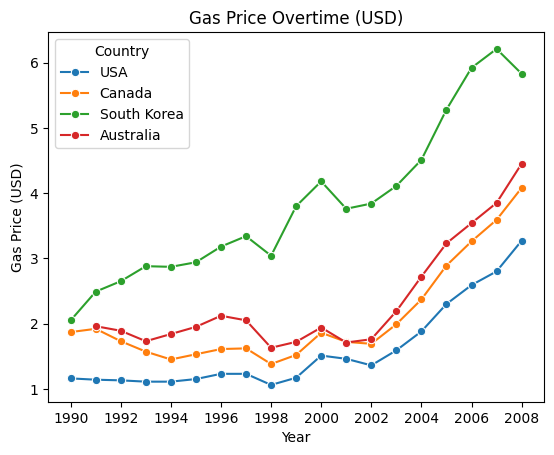

In [14]:

# Create line chart for gas prices over time broken down by Country
sns.lineplot(data = gas, x = 'Year', y = 'Gas_Price', 
             hue = 'Country', markers = True, marker='o')
plt.ylabel("Gas Price (USD)")
plt.title("Gas Price Overtime (USD)")

# Set x ticks to integer only
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
